# Conservaiton hatchery model 

This note book has some code to begin experimenting with a simple model of how domestication selection in a conservaiton hatchery could impact a nearby popualtion of the same species. 

The model tracks the abundnace of two popautlions and the mean and variance of an arbitrary trait that has effect on the fittenss of the individuals. populaiton one has low productivity and is supported by a conservaiton hatchery that uses broodstock from the local popuatlion, riases the offspring in captivity and releases them into the wild. The individuals raied in the captive environment also experince selection on the trait included in the model, but the optimal value in captivity is differnt than the optimal value in the wild. 

Once the hatchery individuals are released, they disperse between the two popualtions, with the majority remaining in population one. After dispersal the popualtions experince density dependent mortality, brood stock is removed from popualtion one, each population randomly mates, and the generation dies. 

The goal of this model is to understand how adaptation of hatchery reared individuals 


In [812]:
include("normal_trait_distribution.jl")
include("two_populations_conservaiton_hatchery.jl")
using Plots
using NLsolve

In [813]:
# params
x = [1.0,0.0]
mu = [0.0,0.0]
sigma = [0.25,0.25]
# parameters 
mu_s = [0.0,3.0,0.0]
sigma_s = [1.0,1.0,1.0]
k = [1.0,1.0]
f = [1.325,1.45]
V_le = 1.0
s = 0.1
prop = 0.02
max = 0.01


0.01

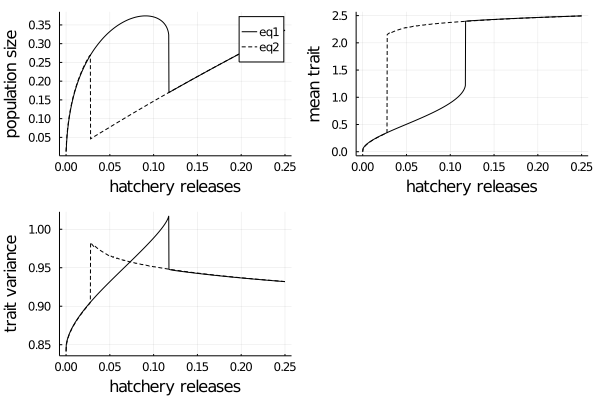

In [814]:
mod2 = two_populations_conservaiton_hatchery.population(x,mu,sigma,mu_s,sigma_s,k,f,V_le,s,prop,max)
N = 1001
x1 = zeros(N,3)
x2 = zeros(N,3)
r = collect(0.0:0.001:1).*0.25
#b = 0.1975
b = 2.0
for i in 1:N
    mod2 = two_populations_conservaiton_hatchery.equilibrium_population_fpi(mod2,r[i])
    x1[i,1]= mod2.x[1]
    x1[i,2]= mod2.mu[1]
    x1[i,3]= mod2.sigma[1]

end

for i in 1:N
    mod2 = two_populations_conservaiton_hatchery.equilibrium_population_fpi(mod2,reverse(r)[i])
    x2[i,1]= mod2.x[1]
    x2[i,2]= mod2.mu[1]
    x2[i,3]= mod2.sigma[1]

end


p1 = Plots.plot(r[r.<b],x1[r.<b,1],color = "black", labels = "eq1" , xlabel = "hatchery releases", ylabel = "population size")
Plots.plot!(p1,reverse(r),x2[:,1], color = "black", linestyle =:dash, labels =  "eq2")

p2 = Plots.plot(r[r.<b],x1[r.<b,2], color = "black", labels = false , xlabel = "hatchery releases", ylabel = "mean trait")
Plots.plot!(p2,reverse(r),x2[:,2], color = "black", linestyle =:dash, labels =  false)

p3 = Plots.plot(r[r.<b],x1[r.<b,3], color = "black", labels = false, xlabel = "hatchery releases", ylabel = "trait variance")
Plots.plot!(p3,reverse(r),x2[:,3], color = "black", linestyle =:dash, labels =  false)

plot(p1,p2,p3)

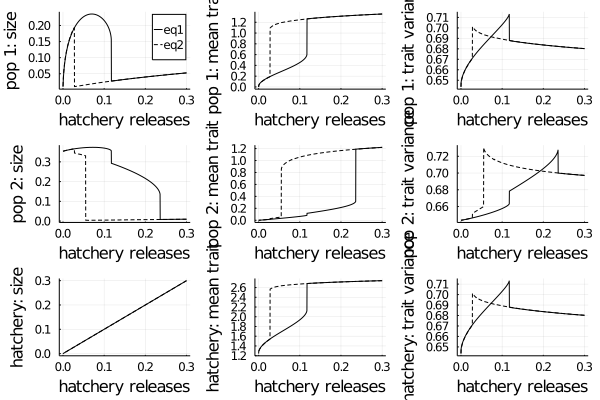

In [810]:

mod2.x = [1,1]
mod2.mu = [0.0,0.0]
mod2.sigma = [1.0,1.0]

N = 1001
x1 = zeros(N,9)
x2 = zeros(N,9)
r = collect(0.0:0.001:1).*0.3
#b = 0.1975
b = 2.0
for i in 1:N
    mod2 = two_populations_conservaiton_hatchery.equilibrium_population_fpi(mod2,r[i])
    mod2, x, mu, sigma = two_populations_conservaiton_hatchery.update_populations_return_state(mod2,r[i])
    x1[i,1:3]= x
    x1[i,4:6]= mu
    x1[i,7:9]= sigma

end

for i in 1:N
    mod2 = two_populations_conservaiton_hatchery.equilibrium_population_fpi(mod2,reverse(r)[i])
    mod2, x, mu, sigma = two_populations_conservaiton_hatchery.update_populations_return_state(mod2,reverse(r)[i])
    x2[i,1:3]= x
    x2[i,4:6]= mu
    x2[i,7:9]= sigma

end


p1 = Plots.plot(r[r.<b],x1[r.<b,1],color = "black", labels = "eq1" , xlabel = "hatchery releases", ylabel = "pop 1: size")
Plots.plot!(p1,reverse(r),x2[:,1], color = "black", linestyle =:dash, labels =  "eq2")

p2 = Plots.plot(r[r.<b],x1[r.<b,4], color = "black", labels = false , xlabel = "hatchery releases", ylabel = "pop 1: mean trait")
Plots.plot!(p2,reverse(r),x2[:,4], color = "black", linestyle =:dash, labels =  false)

p3 = Plots.plot(r[r.<b],x1[r.<b,7], color = "black", labels = false, xlabel = "hatchery releases", ylabel = "pop 1: trait variance")
Plots.plot!(p3,reverse(r),x2[:,7], color = "black", linestyle =:dash, labels =  false)

p4 = Plots.plot(r[r.<b],x1[r.<b,2],color = "black", labels = false , xlabel = "hatchery releases", ylabel = "hatchery: size")
Plots.plot!(p4,reverse(r),x2[:,2], color = "black", linestyle =:dash, labels =  false)

p5 = Plots.plot(r[r.<b],x1[r.<b,5], color = "black", labels = false , xlabel = "hatchery releases", ylabel = "hatchery: mean trait")
Plots.plot!(p5,reverse(r),x2[:,5], color = "black", linestyle =:dash, labels =  false)

p6 = Plots.plot(r[r.<b],x1[r.<b,8], color = "black", labels = false, xlabel = "hatchery releases", ylabel = "hatchery: trait variance")
Plots.plot!(p6,reverse(r),x2[:,8], color = "black", linestyle =:dash, labels =  false)

p7 = Plots.plot(r[r.<b],x1[r.<b,3],color = "black", labels = false , xlabel = "hatchery releases", ylabel = "pop 2: size")
Plots.plot!(p7,reverse(r),x2[:,3], color = "black", linestyle =:dash, labels =  false)

p8 = Plots.plot(r[r.<b],x1[r.<b,6], color = "black", labels = false , xlabel = "hatchery releases", ylabel = "pop 2: mean trait")
Plots.plot!(p8,reverse(r),x2[:,6], color = "black", linestyle =:dash, labels =  false)

p9 = Plots.plot(r[r.<b],x1[r.<b,9], color = "black", labels = false, xlabel = "hatchery releases", ylabel = "pop 2: trait variance")
Plots.plot!(p9,reverse(r),x2[:,9], color = "black", linestyle =:dash, labels =  false)

plot(p1,p2,p3,p7,p8,p9,p4,p5,p6)


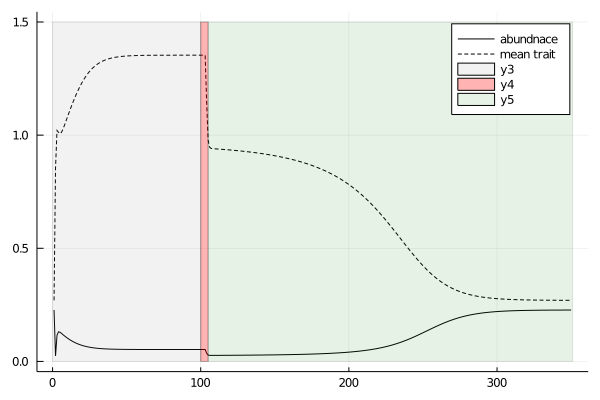

In [883]:
# rate tipping 
n_steps = 350
mod2.x = [0.05,0]
mod2.mu = [1.25,0.0]
mod2.sigma = [0.68,1.0]

path1 = zeros(n_steps)
path2 = zeros(n_steps)
r = vcat(repeat([0.3],100),collect(0.3:-0.2:0.1) ,repeat([0.05],1000))
for i in 1:n_steps
    path1[i] = x[1]
    path2[i] = mu[1]
    mod2, x, mu, sigma = two_populations_conservaiton_hatchery.update_populations_return_state(mod2,r[i])
    
end
rectangle(w, h, x, y) = Plots.Shape(x .+ [0,w,w,0], y .+ [0,0,h,h])
Plots.plot(1:n_steps, path1, label = "abundnace", color = "black")
Plots.plot!(1:n_steps,path2, label = "mean trait", color = "black", linestyle =:dash)
plot!(rectangle(100,1.5,0,0), opacity=.1, color = "grey")
plot!(rectangle(5,1.5,100,0), opacity=.3, color = "red")
plot!(rectangle(246,1.5,105,0), opacity=.1, color = "green")

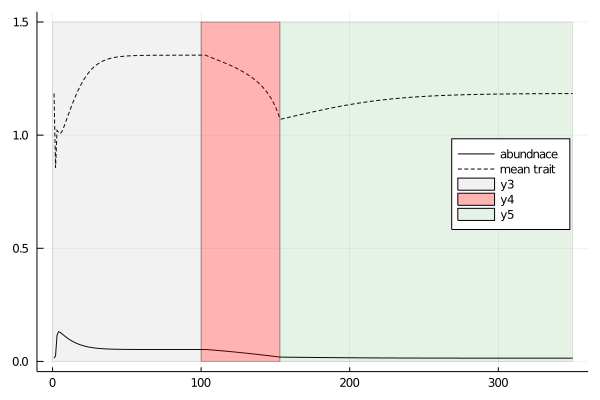

In [879]:
# rate tipping 
n_steps = 350
mod2.x = [0.05,0]
mod2.mu = [1.25,0.0]
mod2.sigma = [0.68,1.0]

path1 = zeros(n_steps)
path2 = zeros(n_steps)
r = vcat(repeat([0.3],100),collect(0.3:-0.005:0.05), repeat([0.05],1000))
for i in 1:n_steps
    path1[i] = x[1]
    path2[i] = mu[1]
    mod2, x, mu, sigma = two_populations_conservaiton_hatchery.update_populations_return_state(mod2,r[i])
    
end

Plots.plot(1:n_steps, path1, label = "abundnace", color = "black",legend=:right)
Plots.plot!(1:n_steps,path2, label = "mean trait", color = "black", linestyle =:dash)
plot!(rectangle(100,1.5,0,0), opacity=.1, color = "grey")
plot!(rectangle(53,1.5,100,0), opacity=.3, color = "red")
plot!(rectangle(197,1.5,153,0), opacity=.1, color = "green")